## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [270]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [41]:
# Your code here
DF_raw = pd.read_csv('mapdataall.csv')

show(DF_raw)

In [44]:
num_variables = DF_raw.shape[1]
num_observations = DF_raw.shape[0]

num_variables

23

In [48]:
num_variables = DF_raw.shape[1]
num_observations = DF_raw.shape[0]

num_observations

2732

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

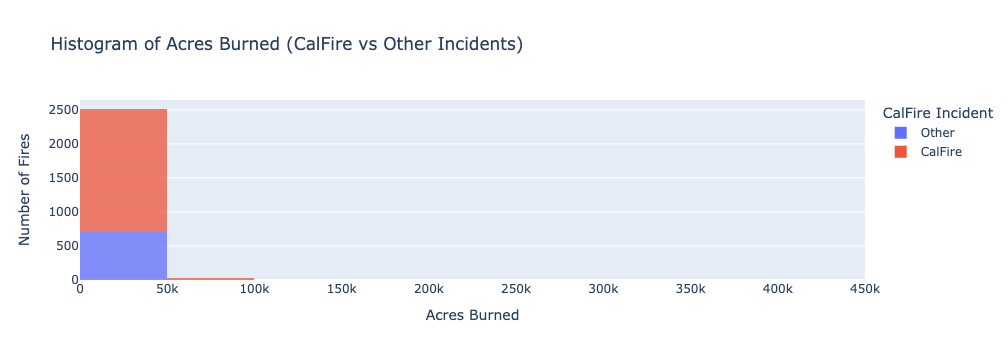

In [174]:
DF_raw = pd.read_csv('mapdataall.csv')
filtered_data = DF_raw[(DF_raw['incident_acres_burned'] > 10) & (DF_raw['incident_acres_burned'] < 500000)].copy()
filtered_data.loc[:, 'CalFire Incident'] = filtered_data['calfire_incident'].map({True: 'CalFire', False: 'Other'})
fig = px.histogram(filtered_data, 
                   x='incident_acres_burned', 
                   color='CalFire Incident', 
                   nbins=10, 
                   title='Histogram of Acres Burned (CalFire vs Other Incidents)',
                   labels={'incident_acres_burned':'Acres Burned'},
                   opacity=0.75)

fig.update_layout(
    xaxis_title="Acres Burned",
    yaxis_title="Number of Fires"
)

fig.show()


In [86]:
big_fires_count = filtered_data[filtered_data['incident_acres_burned'] > 100000].shape[0]
print(f"Number of fires larger than 100,000 acres: {big_fires_count}")
largest_fire = DF_raw.loc[DF_raw['incident_acres_burned'].idxmax()]
print(f"The largest fire is {largest_fire['incident_name']} with {largest_fire['incident_acres_burned']} acres burned.")


Number of fires larger than 100,000 acres: 18
The largest fire is August Complex (includes Doe Fire) with 1032648.0 acres burned.


**(Click Here)**
23 variablew and 2732 observations



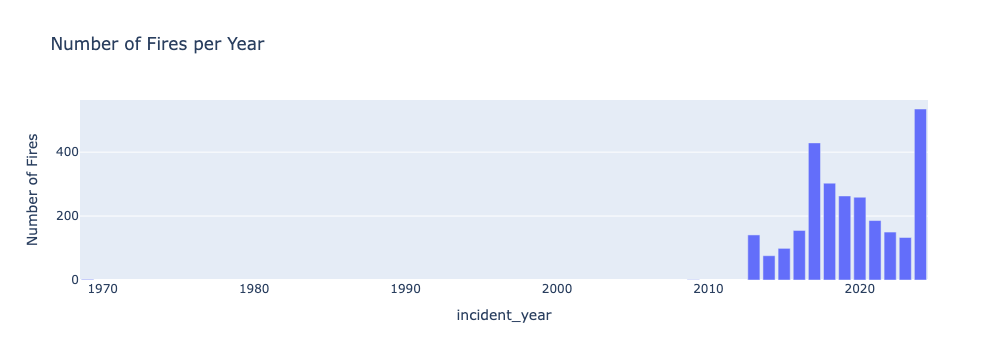

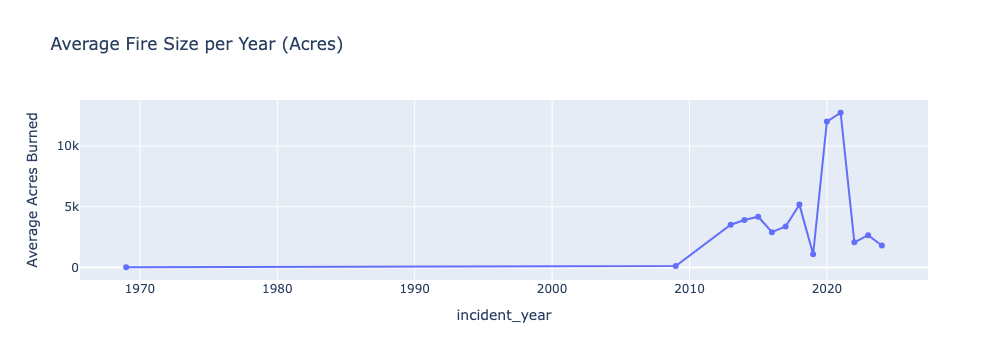

In [104]:



fig1 = px.bar(fires_per_year, x='incident_year', y='Number of Fires', title='Number of Fires per Year')
fig1.show()

fig2 = px.line(average_acres_per_year, x='incident_year', y='Average Acres Burned', title='Average Fire Size per Year (Acres)', markers=True)
fig2.show()


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [132]:
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
year_counts = DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", "Year": "count"})
print(year_counts)


    count  count
0    1945     21
1    1949     20
2    1942     20
3    1950     19
4    1948     19
..    ...    ...
91   1931     10
92   1932      9
93   1928      7
94   1929      6
95   1930      6

[96 rows x 2 columns]


In [114]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [158]:
my_columns = ['Year', 'Awards', 'Nominations']
DF_raw['Awards'] = pd.to_numeric(DF_raw['Awards'], errors='coerce')
DF_raw['Nominations'] = pd.to_numeric(DF_raw['Nominations'], errors='coerce')
summary_stats = DF_raw[my_columns].describe()
show(summary_stats)



**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.


In [172]:
DF_nom = DF_raw['Nominations'].value_counts().reset_index().rename(columns={"index": "value", "Nominations": "count"})
show(DF_nom)


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [248]:
DF_raw=pd.read_csv('germany realestate.csv')
DF_raw

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [255]:
# number of variables= 49
#number of observations=268850
#different data types: bool(6), float64(18), int64(6), object(19)
#The data doesn't need much fixing because missing values are in less important columns, and the types of data look correct. Everything seems fine for analysis without major changes.

In [218]:
DF_raw.shape

(268850, 49)

In [222]:
DF_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

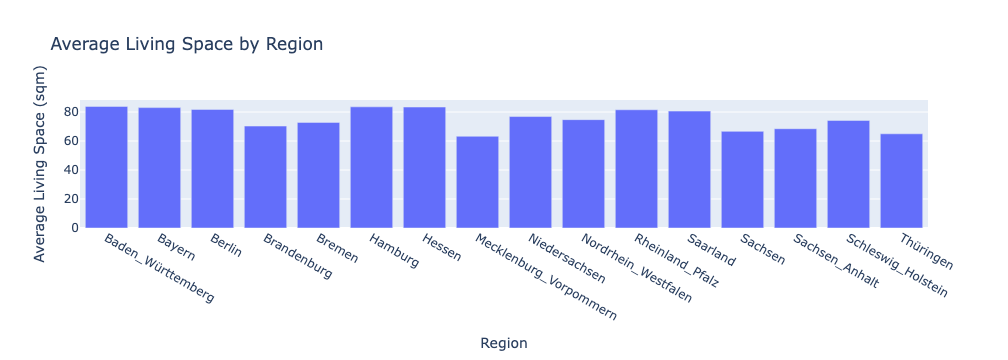

In [265]:

average_living_space = DF_raw.groupby('regio1')['livingSpace'].mean().reset_index()
fig = px.bar(average_living_space, 
             x='regio1', 
             y='livingSpace', 
             title='Average Living Space by Region',
             labels={'livingSpace': 'Average Living Space (sqm)', 'regio1': 'Region'})
fig.show()
